## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
num_rows = df.shape[0]
print(num_rows)

294478


c. The number of unique users in the dataset.

In [4]:
num_unique_users = df['user_id'].nunique()
print(num_unique_users)

290584


d. The proportion of users converted.

In [5]:
p_converted = df['converted'].mean() * 100
print(p_converted, '%')

11.96591935560551 %


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query(
    "group == 'treatment' & landing_page != 'new_page'"
).count()[0]

1965

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query(
    "(group == 'control' & landing_page != 'old_page') | (group == 'treatment' & landing_page != 'new_page')"
).index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
num_unique_users = df2['user_id'].nunique()
print(num_unique_users)

290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeat_id = df2[df2.duplicated(subset=['user_id'])].iloc[0]['user_id']
print(repeat_id)

773192


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.query('user_id == @repeat_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop(df2[df2.duplicated(subset=['user_id'])].index, inplace = True)

# Check again if the row with a duplicate user_id is deleted or not
df2.query('user_id == @repeat_id')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
p_c = df2['converted'].mean()
p_c

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_c_gc = (df2.query('group == "control"')['converted'] == 1).mean()
p_c_gc

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_c_gt = (df2.query('group == "treatment"')['converted'] == 1).mean()
p_c_gt

0.11880806551510564

In [17]:
diff_gc_gt = p_c_gc - p_c_gt
diff_gc_gt

0.0015782389853555567

d. What is the probability that an individual received the new page?

In [18]:
(df2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The Answer:**

After calculating the probability for the treatment group which was 11.8% and the control group was 12%, the difference is too small 0.15% so we can't say which leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The Answer:**

-> The old page is better

Null hypothesis H(0): **$p_{old}$** >= **$p_{new}$**         

-> The new page is better

Alternative hypothesis H(1): **$p_{new}$** > **$p_{old}$**   

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
convert_rate_new = df2['converted'].mean()
convert_rate_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
convert_rate_old = df2['converted'].mean()
convert_rate_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = len(df2[df2['group'] == 'treatment'])
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = len(df2[df2['group'] == 'control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([1,0], size=n_new , p=[convert_rate_new, 1-convert_rate_new])
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([1,0], size=n_old , p=[convert_rate_old, 1-convert_rate_old])
old_page_converted

array([1, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
new_page_converted.mean() - old_page_converted.mean()

-0.00028391097755160744

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Sampling distribution 
p_diffs = []
new_page_converted = np.random.binomial(n_new, convert_rate_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, convert_rate_old, 10000)/n_old
p_diffs = new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [27]:
real_diff = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
real_diff

-0.0015782389853555567

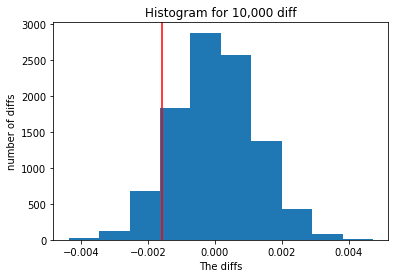

In [28]:
plt.hist(p_diffs)
plt.axvline(real_diff, color='red')
plt.xlabel('The diffs')
plt.ylabel('number of diffs')
plt.title('Histogram for 10,000 diff');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(p_diffs > real_diff).mean()

0.9076

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The Answer:**

- Calculate the probability for 10,000 sample differences and take that is bigger than the Real difference.

- It called the p_value.

- The p_value is 0.9 which is bigger than the type 1 error rate of 0.05, so fails to reject the null hypothesis and that Means that the old page is better.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = (df2[df2['landing_page'] == 'old_page']['converted']).sum()
print("convert_old is:", convert_old)

# number of conversions with the new_page
convert_new = (df2[df2['landing_page'] == 'new_page']['converted']).sum()
print("convert_new is:", convert_new)

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page']=='old_page'])
print('n_old is:', n_old)

# number of individuals who received new_page
n_new = len(df2[df2['landing_page']=='new_page'])
print('n_new is:', n_new)

convert_old is: 17489
convert_new is: 17264
n_old is: 145274
n_new is: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Answer:**

- The Z-score is -1.3 which is smaller than the Z-alpha of 1.645, so fails to reject the null hypothesis and that Means that the old page is better.

- Yes, the p_value also fails to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**The Answer:**

- Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2['ab_page'] = (df2['group'] == 'treatment').astype(int)
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
df2[['converted']]

,converted
0,0
1,0
2,0
3,0
4,1
...,...
294473,0
294474,0
294475,0
294476,0


In [35]:
import statsmodels.api as sm

inp = df2[['intercept', 'ab_page']]
outp = df2[['converted']]
model = sm.Logit(outp, inp)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               8.077e-06
Time:                        13:33:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The Answer:**

- the p-value is 0.190

- Because the difference in the type of tests:

 - in part 2: a one-tailed test.
 
 - in part 3: a two tailed test.

- Because the two have different hypotheses:

 - Null hypothesis (H0): $p_{new}$ = $p_{old}$ 
 
 - Alternative hypothesis (H1): $p_{new}$ != $p_{old}$ 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The Answer:**

- Yes, becouse The p_value to ab_page is 1.90 which is bigger than the type 1 error rate of 0.05. That is, it does not affect.
- Yes, might happen a multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [38]:
# Join with the df2 dataframe
df_with_country = df2.join(countries.set_index('user_id'), on='user_id')
df_with_country.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [39]:
# Create the necessary dummy variables
df_with_country[['UK', 'US']] = pd.get_dummies(df_with_country.country)[['UK', 'US']]
df_with_country

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1
...,...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,0,1
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,0,1
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,1
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,1


In [40]:
inp = df_with_country[['intercept', 'ab_page', 'US', 'UK']]
outp = df_with_country[['converted']]
model2 = sm.Logit(outp, inp)
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [41]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               2.323e-05
Time:                        13:33:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

- P_values to all is bigger than the type 1 error rate 0.05.

- The p_values fails to reject the null hypothesis.

- The countries not effect on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
df_with_country['ab_page_UK'] = df_with_country['ab_page'] * df_with_country['UK']
df_with_country['ab_page_US'] = df_with_country['ab_page'] * df_with_country['US']
df_with_country

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,ab_page_UK,ab_page_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0,US,0,1,0,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0,US,0,1,0,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0,US,0,1,0,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0,US,0,1,0,0


In [43]:
# Fit your model, and summarize the result
inp = df_with_country[['intercept', 'ab_page', 'US', 'UK', 'ab_page_US', 'ab_page_UK']]
outp = df_with_country[['converted']]
model3 = sm.Logit(outp, inp)
result3 = model3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [44]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               3.482e-05
Time:                        13:33:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**My conclusions based on the results:**

- P_values to all is bigger than the type 1 error rate 0.05.

- The p_values fails to reject the null hypothesis.

- The page, country and interaction between page and country not effect on the conversion rate.

- **In the end,** we concluded after all our calculations that it is better not to create the new page because it will not increase our sales and will not affect on the work and the old one is performing better and. Money and effort will be spent without interest on the new page.